<a href="https://colab.research.google.com/github/Fuzailsheikh786/Bharat-intern/blob/main/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [44]:
!pip install matplotlib

In [45]:
import matplotlib.pyplot as plt


In [48]:
import numpy as np


In [25]:
!pip install kaggle

In [26]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [27]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [28]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [29]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [30]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [31]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [32]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [34]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 111ms/step - loss: 0.0616 - accuracy: 0.9796 - val_loss: 0.9541 - val_accuracy: 0.8068
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.0521 - accuracy: 0.9825 - val_loss: 0.7463 - val_accuracy: 0.8126
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.0364 - accuracy: 0.9890 - val_loss: 0.7477 - val_accuracy: 0.8194
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.0470 - accuracy: 0.9857 - val_loss: 0.8333 - val_accuracy: 0.8224
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.0427 - accuracy: 0.9873 - val_loss: 1.0081 - val_accuracy: 0.7634
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.0463 - accuracy: 0.9858 - val_loss: 1.0810 - val_accuracy: 0.8158
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.0354 - accuracy: 0.9890 - val_loss: 0.8291 - val_ac

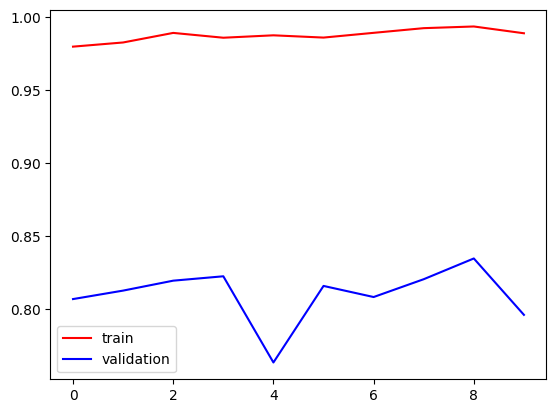

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

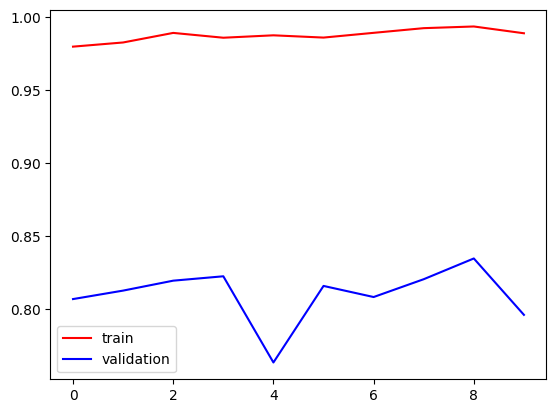

In [36]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

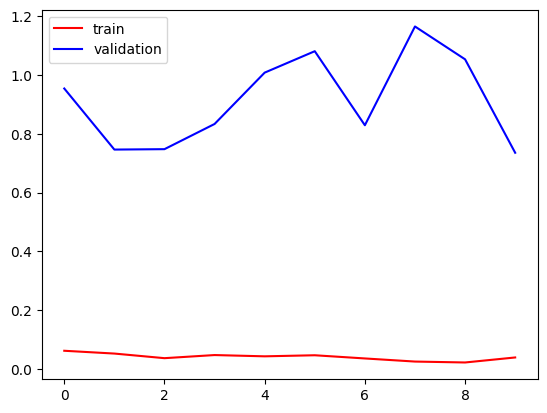

In [37]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

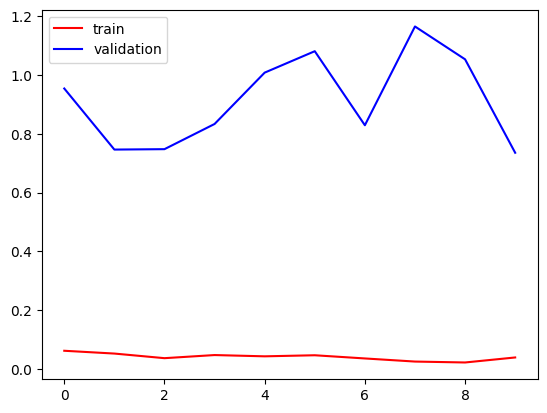

In [38]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [39]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [40]:
import cv2

In [55]:
test_img = cv2.imread('/content/cat.png')

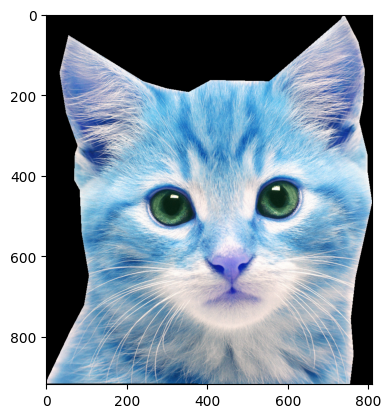

In [56]:
plt.imshow(test_img)

In [57]:
test_img.shape

(918, 809, 3)

In [58]:
test_img = cv2.resize(test_img,(256,256))

In [59]:
test_input = test_img.reshape((1,256,256,3))

In [60]:
model.predict(test_input)

1/1 [==============================] - 0s 387ms/step


array([[3.8138066e-13]], dtype=float32)